In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# load saved data
df = pd.read_csv("autos.csv")

df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 1) Find and replace "dirty" entrys.

In [2]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


We want to replace or delete data which cannot be compute or will distract computations.

In [3]:
# noticable thing we see is a string ?
# we replace it with nan
df = df.replace('?', np.nan)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# some features are possibly null (not provided in the table)
# let's find those, the True means that there was null data
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
#df[df[header_list[1]].isnull() == True]
# we save names of columns in wich data
# is not given
missing_col_names = []
# let see where and how many missed values there is
for column in missing_data:
    miss = missing_data[column][missing_data[column] == True].count()
    if miss > 0:
        missing_col_names.append(column)
        print(f"{column} : {miss}".rjust(21))

# later we are going delete rows with null values in price column       
del missing_col_names[-1]
# deleting "num-of-doors" because its non-numerical values
del missing_col_names[1]

normalized-losses : 41
     num-of-doors : 2
             bore : 4
           stroke : 4
       horsepower : 2
         peak-rpm : 2
            price : 4


The missing places we replace with mean value of according row or with a string (except "price" column). For example in column "num-of-doors" there are non-numerical type values: "two", "four", NaN. We can see it in output below.

In [6]:
print(df["num-of-doors"].loc[df["num-of-doors"].isnull()])
df["num-of-doors"].describe()

27    NaN
63    NaN
Name: num-of-doors, dtype: object


count      203
unique       2
top       four
freq       114
Name: num-of-doors, dtype: object

In [7]:
# we replace the null values with four
# because this more likely for cars to have four doors
df["num-of-doors"].replace(np.nan, "four", inplace=True)
df["num-of-doors"].describe()

count      205
unique       2
top       four
freq       116
Name: num-of-doors, dtype: object

We calculate means.

In [8]:
# we calculate the means of rows
avg_dict = {}
#avg_norm_los = df[missing_col_names[0]].astype("float").mean(axis=0)
avg_dict = {col_name : df[col_name].astype("float").mean(axis=0) for col_name in missing_col_names}
avg_dict
# every nnull entry will be replaced accrodingly with the mean of feature column avrage

{'normalized-losses': 122.0,
 'bore': 3.3297512437810957,
 'stroke': 3.2554228855721337,
 'horsepower': 104.25615763546799,
 'peak-rpm': 5125.369458128079}

Now we will replace other NaN values in numerical type features with means.

In [9]:
for key in avg_dict:
    df[key].replace(np.NaN,avg_dict[key],inplace=True)

Because price is a very crutial fing, it seems wise to delete entrys with blank in this feature.

In [10]:
# let us find missing places
null_price = df["price"].isnull()
df_null_price = df["price"].loc[null_price]
print(df_null_price)

# delete rows where price is null
# using method dropna
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

9      NaN
44     NaN
45     NaN
129    NaN
Name: price, dtype: object


## 2) Correct data type.
Last step is to make sure if we have correct data tye entrys.

In [11]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
# we make sure that our collumns got
# proper type
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## 3) Data standarization/normalization.
Our goal is to find price of gas cost per 100 km but we were given price per 100 miles. We need to change that knowing L/100km = 235/mpg

In [13]:
# we create new column with converted values
df["city-L/100km"] = 235/df["city-mpg"]
df["highway-L/100km"] = 235/df["highway-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


Additionaly we can replace mpg columns with new columns using example code below

In [14]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
#df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
#df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
#df.head()

Last step, we normalize data so that their values range from 0 to 1 (but it can be arbitrary). We will do normalization on width, height, length features.

In [15]:
df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()
df["height"] = df["height"]/df["height"].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## 4) Bining
Is a process of transforming continous data into discrete categorical one. For example if we take from our dataframe column "horspower".

In [16]:
df["horsepower"]

0      111
1      111
2      154
3      102
4      115
      ... 
196    114
197    160
198    134
199    106
200    114
Name: horsepower, Length: 201, dtype: object

In [17]:
#print(df["horsepower"].value_counts())
df["horsepower"].describe()

count     201
unique     59
top        68
freq       19
Name: horsepower, dtype: object

We notice that there is 59 unique numbers but those are object type. We need to convert them to int.

In [18]:
# change the type of data so we can make calculations
# copy=True means that we operate on a copy of dataframe
df["horsepower"]=df["horsepower"].astype(int, copy=True)
# visualize range of feature values
print(" max = {}\n min = {}".format(df["horsepower"].max(),df["horsepower"].min()))

 max = 262
 min = 48


Finnaly we conclude that in "horsepower" feature there are 59 uniqe numbers ranging from 48 to 262. But maybe we want to see them as little horsepower, medium horsepower, high horsepower.

(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

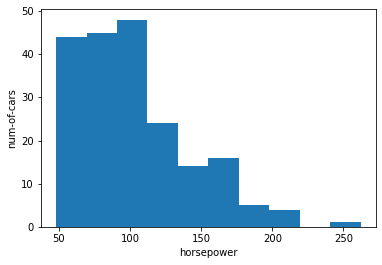

In [19]:
#%matplotlib inline
fig, ax = plt.subplots()
ax.set_xlabel("horsepower")
ax.set_ylabel("num-of-cars")
ax.hist(df["horsepower"])

On a fisrt glimps we see that data distribution clearlly divides itself in three sets. We can describe it as we meantioned above. Let us now create a bins.

In [20]:
# because we want to have three separeted sets
# we need four dividers
bins = np.linspace(df["horsepower"].min(), df["horsepower"].max(),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [21]:
group_names = ["Low", "Medium", "High"]

df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels=group_names, include_lowest=True)
df[["horsepower","horsepower-binned"]]

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
...,...,...
196,114,Low
197,160,Medium
198,134,Medium
199,106,Low


In [22]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0, 0.5, 'num-of-cars')

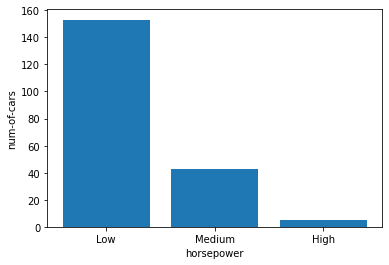

In [24]:
fig1, ax1 = plt.subplots()
ax1.bar(group_names, df["horsepower-binned"].value_counts())
ax1.set_xlabel("horsepower")
ax1.set_ylabel("num-of-cars")


Succsefully we narrowed dawn 59 categorical intervals into 3!

Lets see those bins on original histogram.

(array([153.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <BarContainer object of 3 artists>)

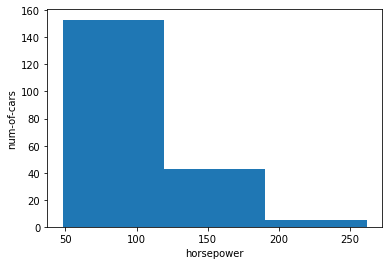

In [25]:
fig, ax = plt.subplots()
ax.set_xlabel("horsepower")
ax.set_ylabel("num-of-cars")
ax.hist(df["horsepower"], bins=3)

## 5) Indicator variable (dummy variable).

In [26]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [28]:
df["fuel-type"].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

There are two uniqe entrys describing fuel driven cars: gas, diesel. We need to change it for the sake of regression in future analysis. We can assaign a variable to each, for example when car is driven by fuel it will be 1, and conversly 0 for disel. 

In [31]:
dummy_variable_fuel = pd.get_dummies(df["fuel-type"])
dummy_variable_fuel.rename(columns={"gas":"fuel-type-gas","diesel":"fuel-type-diesel"},inplace=True)
dummy_variable_fuel

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [32]:
# merge data frame df and dummys dummy_variable_fuel
# axis=1 inidcates that we concatynate 
# horyzintally = poziomo
df = pd.concat([df,dummy_variable_fuel],axis=1)
# we could also drop the column fuel
# because we change it equivalently, by
# df.drop("fuel-type", axis = 1, inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,114,5400.0,23,28,16845.0,10.217391,8.392857,Low,0,1
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,160,5300.0,19,25,19045.0,12.368421,9.400000,Medium,0,1
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,134,5500.0,18,23,21485.0,13.055556,10.217391,Medium,0,1
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,106,4800.0,26,27,22470.0,9.038462,8.703704,Low,1,0


Lets do the same thing for aspiration column

In [34]:
# check how many categories there can be
df["aspiration"].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [36]:
dummies_asprtn = pd.get_dummies(df["aspiration"])
dummies_asprtn

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [37]:
df = pd.concat([df, dummies_asprtn], axis=1)
# we should also drop the column aspiration
# because we acctually replaced it with dummies
# to do this uncomment
# df.drop(df["aspiration"],axis=True,inplace=True)
# but i won't do it here
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,std,turbo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,23,28,16845.0,10.217391,8.392857,Low,0,1,1,0
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,19,25,19045.0,12.368421,9.400000,Medium,0,1,0,1
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,18,23,21485.0,13.055556,10.217391,Medium,0,1,1,0
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,26,27,22470.0,9.038462,8.703704,Low,1,0,0,1


We could also more compress data by simply droping columns with descriptive values but also drop the one colum for each dummy table.

## 6) Save cleaned dataframe.

In [38]:
df.to_csv("clean_autos.csv")